# Name - Subham Kedia
# UNI -  sk4355
# Research Assistant Task-1

In [29]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

%matplotlib inline

In [30]:
economy_wide = pd.read_csv("bds_f_all_release.csv") # reading and saving the economy wide dataset
sector = pd.read_csv("bds_f_sic_release.csv") # reading and saving the sector dataset
size = pd.read_csv("bds_f_sz_release.csv") # reading and saving the firm size dataset

### Task-1, part-1

In [31]:
size.head()

,year2,fsize,Firms,Estabs,Emp,Denom,Estabs_Entry,Estabs_Entry_Rate,Estabs_Exit,Estabs_Exit_Rate,...,Job_Destruction_Rate_Deaths,Job_Destruction_Rate,Net_Job_Creation,Net_Job_Creation_Rate,Reallocation_Rate,d_flag,firmdeath_firms,firmdeath_estabs,firmdeath_emp,sic1
0,1977,a) 1 to 4,2024233,2032018,4491493,4346068,480220,24.1,391696,19.6,...,22.0,32.3,290850,6.7,64.6,0,296754.0,297198.0,750459.0,NaN
1,1977,b) 5 to 9,686103,708931,4663342,4550280,67327,9.6,45318,6.5,...,11.2,22.5,226125,5.0,45.0,0,31761.0,32303.0,390633.0,NaN
2,1977,c) 10 to 19,381170,418905,5342410,5220630,40578,9.9,23785,5.8,...,9.4,19.5,243560,4.7,39.0,0,13765.0,14205.0,359036.0,NaN
3,1977,d) 20 to 49,220469,281988,6900793,6748250,29488,10.7,15544,5.7,...,8.0,17.9,305086,4.5,35.8,0,6547.0,6991.0,377642.0,NaN
4,1977,e) 50 to 99,67179,117374,4751217,4635094,13373,11.8,6247,5.5,...,6.3,15.7,232247,5.0,31.4,0,1382.0,1582.0,185565.0,NaN


In [32]:
# storing the value: number of firms in each firm size divided by total number of firms for every year.
# the key of the dictionary is a particular year.
# the value of a particular key is the number of firms divided by total number of firms for each firm size.
groups = size.groupby('year2') # creating groups according to years 
out = {}
for name, group in groups:
    temp = group['Firms']/group['Firms'].sum()
    out[name] = temp
df = pd.DataFrame(out)
dict1 = {}
for col in df.columns:
    df[col].dropna(inplace=True)
    dict1[col] = np.array(df[col])
print(dict1.keys()) # displaying the keys of the dictionary
print('------------')
print(dict1[1977]) # gives us the number of firms divided by total number of firms for each firm size for 1977.

dict_keys([1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])
------------
[  5.89809246e-01   1.99912704e-01   1.11063099e-01   6.42389758e-02
   1.95742266e-02   9.72286527e-03   2.72493140e-03   1.36858456e-03
   8.39157661e-04   3.34788942e-04   1.99591319e-04   2.11829034e-04]


In [33]:
# making a new dictionary which has key as the firm sizes.
# the value of a particular is number of firms for that firm size divided by total number of firms for every year.
a = size['fsize'].unique()
dict2 = {}
i = 0
for temp in a:
    lis = []
    for key in dict1:
        lis.append(dict1[key][i])
    dict2[temp] = lis    
    i = i+1
print(dict2.keys()) # displaying the keys of the dictionary
print('------------')
print(dict2['a) 1 to 4']) #gives us the  number of firms divided by total number of firms for 'a) 1 to 4' for every year.

dict_keys(['a) 1 to 4', 'b) 5 to 9', 'c) 10 to 19', 'd) 20 to 49', 'e) 50 to 99', 'f) 100 to 249', 'g) 250 to 499', 'h) 500 to 999', 'i) 1000 to 2499', 'j) 2500 to 4999', 'k) 5000 to 9999', 'l) 10000+'])
------------
[0.58980924606054819, 0.57544463948597357, 0.55780928611194758, 0.55361090952519099, 0.55769246939442474, 0.55333832265926652, 0.56103308327758628, 0.56071280174957117, 0.55413144876609344, 0.55010375808760292, 0.54828701209447894, 0.54288402001780456, 0.53780414754469763, 0.53646303822403918, 0.53779124708704351, 0.54234248899658444, 0.5463838185705997, 0.54785797019421545, 0.55017824810056404, 0.5488551187593933, 0.54793358301996653, 0.54712355696593884, 0.54547544506569223, 0.54054679455288035, 0.53992541147945905, 0.54170155082688154, 0.5450395220617853, 0.54521419075086608, 0.54853847799451561, 0.54742206334434673, 0.54757238232732097, 0.54957091853793327, 0.54788374519814664, 0.55465090003752682, 0.55802835647477045, 0.56097159771896976, 0.56071435606733666, 0.559814

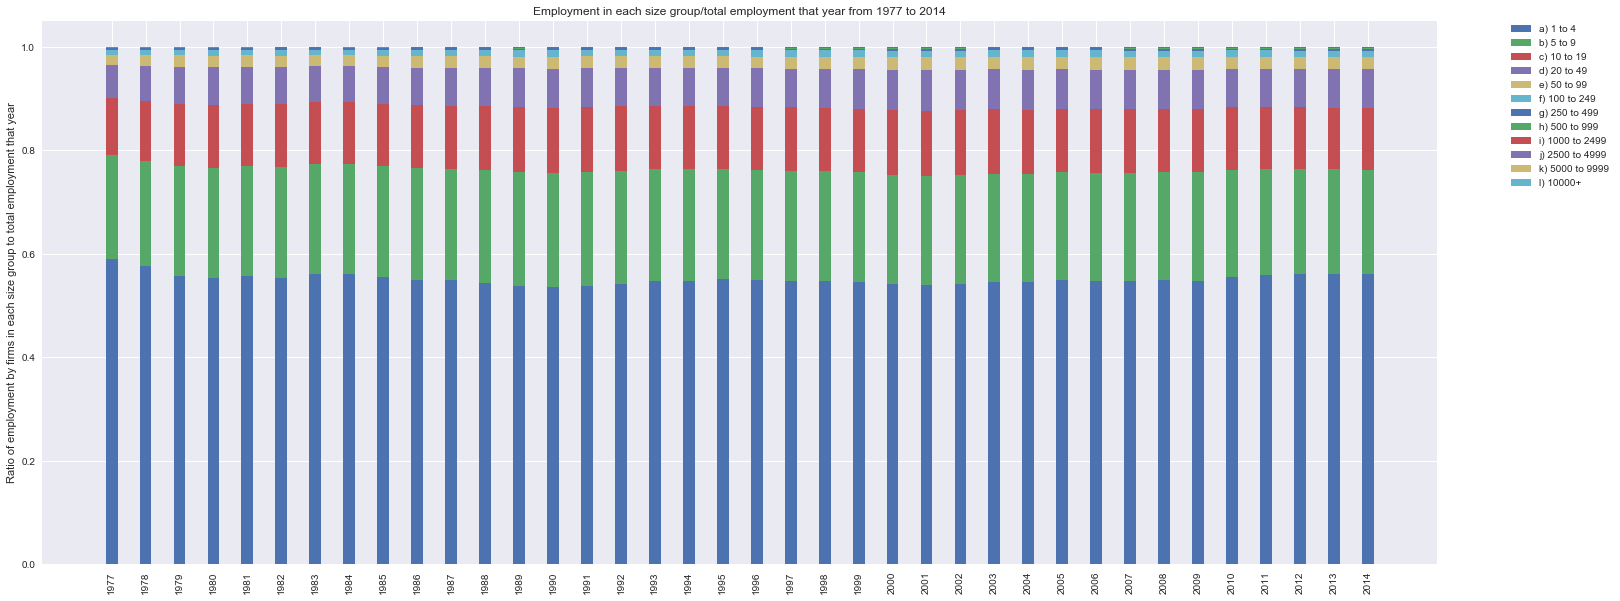

In [34]:
# Plotting
N = 38 # number of years from 1977 to 2014
ind = np.arange(N)
width = 0.35
year = list(range(1977, 2015))

data1 = np.array(dict2['a) 1 to 4'])
data2 = np.array(dict2['b) 5 to 9'])
data3 = np.array(dict2['c) 10 to 19'])
data4 = np.array(dict2['d) 20 to 49'])
data5 = np.array(dict2['e) 50 to 99'])
data6 = np.array(dict2['f) 100 to 249'])
data7 = np.array(dict2['g) 250 to 499'])
data8 = np.array(dict2['h) 500 to 999'])
data9 = np.array(dict2['i) 1000 to 2499'])
data10 = np.array(dict2['j) 2500 to 4999'])
data11 = np.array(dict2['k) 5000 to 9999'])
data12 = np.array(dict2['l) 10000+'])
    
plt.figure(figsize=(25,10))
p1 = plt.bar(ind, data1, width)
p2 = plt.bar(ind, data2, width, bottom = data1)
p3 = plt.bar(ind, data3, width, bottom = data1+data2)
p4 = plt.bar(ind, data4, width, bottom = data1+data2+data3)
p5 = plt.bar(ind, data5, width, bottom = data1+data2+data3+data4)
p6 = plt.bar(ind, data6, width, bottom = data1+data2+data3+data4+data5)
p7 = plt.bar(ind, data7, width, bottom = data1+data2+data3+data4+data5+data6)
p8 = plt.bar(ind, data8, width, bottom = data1+data2+data3+data4+data5+data6+data7)
p9 = plt.bar(ind, data9, width, bottom = data1+data2+data3+data4+data5+data6+data7+data8)
p10 = plt.bar(ind, data10, width, bottom = data1+data2+data3+data4+data5+data6+data7+data8+data9)
p11 = plt.bar(ind, data11, width, bottom = data1+data2+data3+data4+data5+data6+data7+data8+data9+data10)
p12 = plt.bar(ind, data12, width, bottom = data1+data2+data3+data4+data5+data6+data7+data8+data9+data10+data11)

plt.ylabel('Ratio of employment by firms in each size group to total employment that year')
plt.title('Employment in each size group/total employment that year from 1977 to 2014')
plt.xticks(ind, year,rotation=90)
plt.legend(dict2.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Task-1, part-2

In [35]:
sector.head()

,year2,sic1,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,...,job_destruction_continuers,job_destruction_rate_deaths,job_destruction_rate,net_job_creation,net_job_creation_rate,reallocation_rate,firmdeath_firms,firmdeath_estabs,firmdeath_emp,d_flag
0,1977,7,35945,36976,275551,253803,7306,19.8,7083,19.2,...,33902,11.2,24.6,43497,17.1,49.2,4996,5006,19331.0,0
1,1977,10,19363,25448,800256,770048,4347,17.5,3193,12.8,...,73731,6.5,16.1,60416,7.8,32.2,1949,1958,20198.0,0
2,1977,15,383365,388916,3398401,3299285,81821,21.7,56837,15.0,...,521360,7.9,23.7,198231,6.0,47.4,38150,38173,174431.0,0
3,1977,20,259987,316750,19326182,18853860,38800,12.4,31186,10.0,...,1236191,2.9,9.4,944645,5.1,18.8,21326,21409,252009.0,0
4,1977,40,121029,163437,4303510,4107418,24749,15.5,17462,10.9,...,448839,3.4,14.3,392184,9.6,28.6,11998,12059,74049.0,0


In [36]:
# storing the value: number of firms in each sector divided by total number of firms for every year.
# the key of the dictionary is a particular year.
# the value of a particular key is the number of firms divided by total number of firms for each sector.
groups = sector.groupby('year2') # creating groups according to years 
out = {}
for name, group in groups:
    temp = group['firms']/group['firms'].sum()
    out[name] = temp
df = pd.DataFrame(out)
dict1 = {}
for col in df.columns:
    df[col].dropna(inplace=True)
    dict1[col] = np.array(df[col])
print(dict1.keys()) # displaying the keys of the dictionary
print('-----------')
print(dict1[1977]) # gives us the number of firms divided by total number of firms for each sector for 1977.

dict_keys([1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])
-----------
[ 0.01041615  0.00561101  0.11109157  0.07533907  0.0350718   0.07974895
  0.2723519   0.08629421  0.32407534]


In [37]:
# making a new dictionary which has key as the sectors.
# the value of a particular is number of firms for that sector divided by total number of firms for every year.
a = sector['sic1'].unique()
dict2 = {}
i = 0
for temp in a:
    lis = []
    for key in dict1:
        lis.append(dict1[key][i])
    dict2[temp] = lis    
    i = i+1
print(dict2.keys()) # displaying the keys of the dictionary
print('------------')
print(dict2[7]) #gives us the number of firms divided by total number of firms for sector-7 for every year.

dict_keys([7, 10, 15, 20, 40, 50, 52, 60, 70])
------------
[0.010416147477231973, 0.010570491353985559, 0.010837847955548957, 0.010998360045586665, 0.011259691943951879, 0.011555582179913919, 0.011908125803786404, 0.012305832171824883, 0.012824995224417466, 0.013313275138025518, 0.013994365732230701, 0.014529334027320552, 0.015098462708826055, 0.015939931833592606, 0.016422357244229718, 0.016847557743965139, 0.017008332950624292, 0.017335718990785301, 0.017864556868896733, 0.01813397413792921, 0.018532344780015125, 0.018835366954673662, 0.019269159156260741, 0.019767310096542347, 0.020085786632338825, 0.020028797085983086, 0.020059800520137425, 0.020404006218650642, 0.020655331817685519, 0.02126245911158145, 0.021643705539149915, 0.022152646343988419, 0.022404206619288276, 0.022771500963132556, 0.022909855949256628, 0.023595186640550402, 0.02360454406877717, 0.024097593991870378]


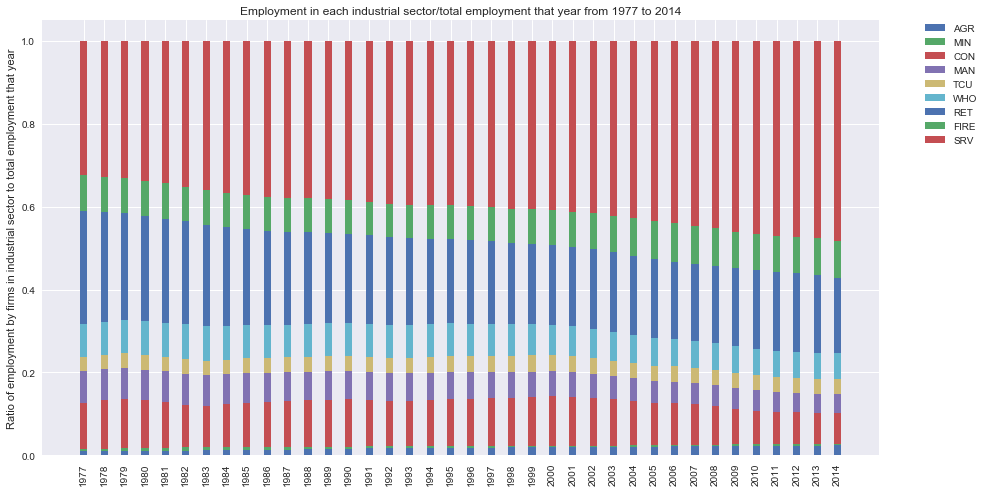

In [38]:
# Plotting
N = 38 # number of years from 1977 to 2014
ind = np.arange(N)
width = 0.35
year = list(range(1977, 2015))

# renaming the sectors as given in the excel dataset and to maintain consistency.
dict2['AGR'] = dict2.pop(7)
dict2['MIN'] = dict2.pop(10)
dict2['CON'] = dict2.pop(15)
dict2['MAN'] = dict2.pop(20)
dict2['TCU'] = dict2.pop(40)
dict2['WHO'] = dict2.pop(50)
dict2['RET'] = dict2.pop(52)
dict2['FIRE'] = dict2.pop(60)
dict2['SRV'] = dict2.pop(70)

data1 = np.array(dict2['AGR'])
data2 = np.array(dict2['MIN'])
data3 = np.array(dict2['CON'])
data4 = np.array(dict2['MAN'])
data5 = np.array(dict2['TCU'])
data6 = np.array(dict2['WHO'])
data7 = np.array(dict2['RET'])
data8 = np.array(dict2['FIRE'])
data9 = np.array(dict2['SRV'])
    
plt.figure(figsize=(15,8))
p1 = plt.bar(ind, data1, width)
p2 = plt.bar(ind, data2, width, bottom = data1)
p3 = plt.bar(ind, data3, width, bottom = data1+data2)
p4 = plt.bar(ind, data4, width, bottom = data1+data2+data3)
p5 = plt.bar(ind, data5, width, bottom = data1+data2+data3+data4)
p6 = plt.bar(ind, data6, width, bottom = data1+data2+data3+data4+data5)
p7 = plt.bar(ind, data7, width, bottom = data1+data2+data3+data4+data5+data6)
p8 = plt.bar(ind, data8, width, bottom = data1+data2+data3+data4+data5+data6+data7)
p9 = plt.bar(ind, data9, width, bottom = data1+data2+data3+data4+data5+data6+data7+data8)

plt.ylabel('Ratio of employment by firms in industrial sector to total employment that year')
plt.title('Employment in each industrial sector/total employment that year from 1977 to 2014')
plt.xticks(ind, year,rotation=90)
plt.legend(dict2.keys(), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [39]:
economy_wide.head()

,year2,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,job_creation,...,job_destruction_deaths,job_destruction_continuers,job_destruction_rate_deaths,job_destruction_rate,net_job_creation,net_job_creation_rate,reallocation_rate,firmdeath_firms,firmdeath_estabs,firmdeath_emp
0,1977,3417903,4153792,66091812,63987631,697749,17.1,526010,12.9,13919514,...,3909657,5801496,6.1,15.2,4208361,6.6,30.4,350748,352967,2224963
1,1978,3470239,4222683,69670352,67833282,626813,15.0,548965,13.1,14062357,...,4283093,6105123,6.3,15.3,3674141,5.4,30.6,360442,362456,2123414
2,1979,3598075,4376325,74016678,71830680,641788,14.9,471892,11.0,14443176,...,3639187,6431992,5.1,14.0,4371997,6.1,28.0,293251,294890,1667500
3,1980,3606457,4398753,74749924,74284989,580305,13.2,524356,12.0,12718175,...,3948087,7840218,5.3,15.9,929870,1.2,31.8,371483,373364,2123575
4,1981,3566572,4341224,73539034,73601473,577646,13.2,609342,14.0,12783982,...,5037764,7871097,6.8,17.5,-124879,-0.1,34.8,365741,367682,2132961


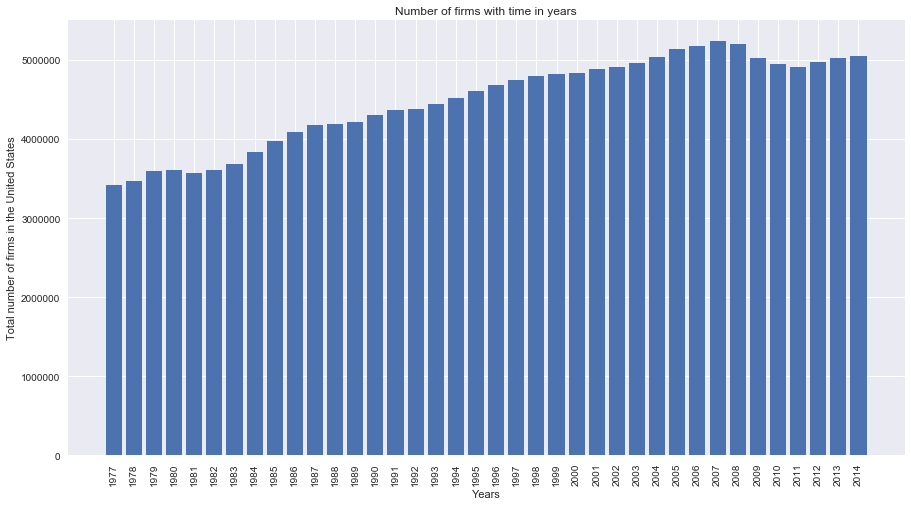

In [40]:
number_of_firms = np.array(economy_wide['firms'])
years = np.array(economy_wide['year2'])
plt.figure(figsize=(15,8))
plt.bar(years, number_of_firms)
plt.xticks(years, year,rotation=90)
plt.xlabel('Years')
plt.ylabel('Total number of firms in the United States')
plt.title('Number of firms with time in years')